# Day2 evening assignments

##### Since each question needs the output of the last one, I put all the quesitons into this one file, with markdown titles seperating them.

## Q1 Download and load SNP dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
df_snps = pd.read_csv('matrix_1kg.txt', sep = '\t')
df_snps

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Q2 Calculate alternate allele frequency for all SNPs

In [12]:
df_snps_counts = df_snps.loc[:, 'HG00096':]
df_snps_counts

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Chromosome counts are twice of the sample size which is 2 * df_snps_counts.shape[1]

In [13]:
df_snps_freq = df_snps_counts.sum(axis = 1)/(2 * df_snps_counts.shape[1])
df_snps_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

### Plot SNP frequency distribution

Text(0, 0.5, 'Counts')

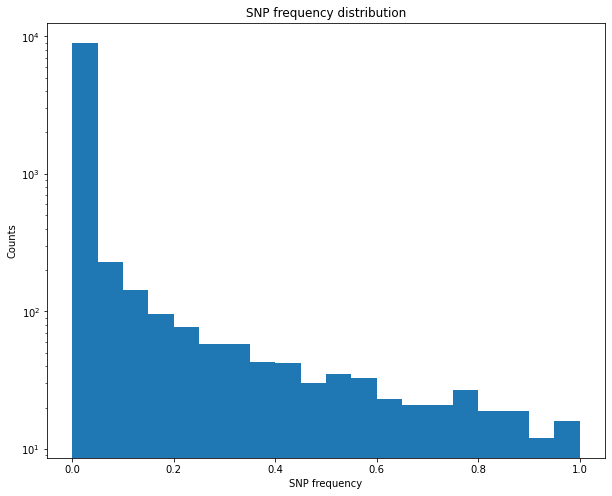

In [148]:
fig, ax = plt.subplots(figsize = (10., 8.))
ax.hist(df_snps_freq, bins = 20, log = True)
ax.set_title('SNP frequency distribution')
ax.set_xlabel('SNP frequency')
ax.set_ylabel('Counts')

### Add the SNP frequencies into the main data frame.

In [18]:
df_snps['Alternate allele frequency'] = df_snps_freq
df_snps

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Alternate allele frequency
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019231
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003336
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002159
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.020604
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000196
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001374
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.028846


## Q3 Create subset for 'common variations' with frequence between 0.05 and 0.95

In [32]:
common_snp = (df_snps['Alternate allele frequency'] >= 0.05) & (df_snps['Alternate allele frequency'] <= 0.95)
common_snp

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Alternate allele frequency, Length: 10000, dtype: bool

In [34]:
SNPoi = df_snps[common_snp]
SNPoi

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Alternate allele frequency
20,chr21,26683267,T,G,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.080259
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,2,0,0,0,1,1,1,0,0.595761
38,chr21,34522570,A,T,0,1,2,1,1,1,...,1,0,1,1,1,1,2,0,1,0.405612
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.094388
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.097527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,0.841837
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0.115973
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0.180730
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,2,2,2,2,1,2,2,2,2,0.810047


## Q4 PCA analysis of SNPs

In [43]:
pca_input = df_snps_counts.T
pca_input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardize the data

In [44]:
pca_input_stded = StandardScaler().fit_transform(pca_input)
print(pca_input_stded.mean())
print(pca_input_stded.var())

1.2238178375811522e-17
0.9812000000000083


### PCA anaysis

In [46]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_stded)
pca_output

array([[ -8.33942982, -10.42877432,  -2.51731044, ...,  -0.04185525,
          0.31947667,   0.4525099 ],
       [ -8.46123843, -10.32329978,  -5.29325646, ...,   0.37665658,
          0.11042814,  -0.15956025],
       [ -8.29420011,  -9.02381809,  -2.84339722, ...,   0.2670869 ,
         -0.14103775,  -0.39631565],
       ...,
       [ -6.33274903,  -3.78075277,   7.00041128, ...,  -0.58317387,
          0.68520908,  -0.43889142],
       [ -8.61492143,  -2.74354723,   8.75605156, ...,   0.2047906 ,
         -0.67010744,  -0.18638754],
       [ -6.07966909,  -1.78563692,   9.18537902, ...,   0.17185646,
          0.19516716,  -0.1998969 ]])

In [48]:
pca_output_df = pd.DataFrame(data = pca_output,
                             columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.339430,-10.428774,-2.517310,-0.334664,-5.381926,1.063276,-0.024627,-0.041855,0.319477,0.452510
1,-8.461238,-10.323300,-5.293256,-0.296620,-2.920926,0.719018,-0.206383,0.376657,0.110428,-0.159560
2,-8.294200,-9.023818,-2.843397,-0.696479,-4.324581,0.751307,0.091361,0.267087,-0.141038,-0.396316
3,-7.921072,-9.075313,-5.264792,-0.159820,-2.886749,-0.444314,0.199448,-0.207688,-0.308780,0.795253
4,-8.883854,-10.099720,-5.298316,0.291882,-0.742309,0.111869,0.445064,0.164420,-0.053754,-0.370007
...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478102,8.887694,0.492037,3.430208,-1.301978,-0.958793,-0.696906,0.696772,-0.685561
2544,-8.438440,-3.946094,11.085581,0.389953,1.475416,0.239922,0.588786,-0.583946,0.965343,1.714184
2545,-6.332749,-3.780753,7.000411,0.876451,1.137832,-1.113135,-0.199198,-0.583174,0.685209,-0.438891
2546,-8.614921,-2.743547,8.756052,-0.252517,1.727617,-0.101877,0.066624,0.204791,-0.670107,-0.186388


Text(0, 0.5, 'PC2')

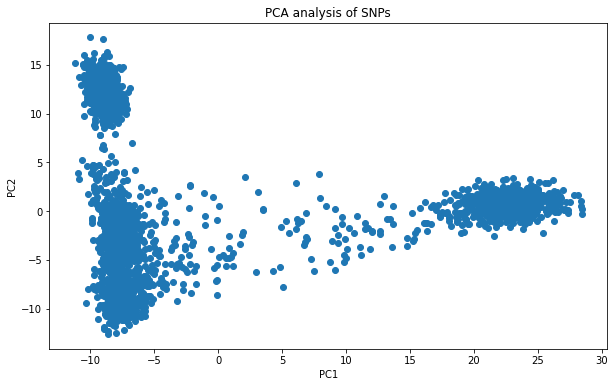

In [150]:
fig, ax = plt.subplots(figsize = (10., 6.))
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('PCA analysis of SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

## Adv. Q1 Load metadata 

In [54]:
df_metadata = pd.read_csv('integrated_call_samples_v3.20130502.ALL.panel.txt', sep = '\t')
df_metadata = df_metadata.iloc[:, :4]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


## Adv. Q2 Plot colored PCA

In [56]:
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-8.339430,-10.428774,-2.517310,-0.334664,-5.381926,1.063276,-0.024627,-0.041855,0.319477,0.452510,HG00096
1,-8.461238,-10.323300,-5.293256,-0.296620,-2.920926,0.719018,-0.206383,0.376657,0.110428,-0.159560,HG00097
2,-8.294200,-9.023818,-2.843397,-0.696479,-4.324581,0.751307,0.091361,0.267087,-0.141038,-0.396316,HG00099
3,-7.921072,-9.075313,-5.264792,-0.159820,-2.886749,-0.444314,0.199448,-0.207688,-0.308780,0.795253,HG00100
4,-8.883854,-10.099720,-5.298316,0.291882,-0.742309,0.111869,0.445064,0.164420,-0.053754,-0.370007,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478102,8.887694,0.492037,3.430208,-1.301978,-0.958793,-0.696906,0.696772,-0.685561,NA21137
2544,-8.438440,-3.946094,11.085581,0.389953,1.475416,0.239922,0.588786,-0.583946,0.965343,1.714184,NA21141
2545,-6.332749,-3.780753,7.000411,0.876451,1.137832,-1.113135,-0.199198,-0.583174,0.685209,-0.438891,NA21142
2546,-8.614921,-2.743547,8.756052,-0.252517,1.727617,-0.101877,0.066624,0.204791,-0.670107,-0.186388,NA21143


### Merge metadata with PCA output file

In [57]:
pca_output_df = pd.merge(pca_output_df, df_metadata)
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-8.339430,-10.428774,-2.517310,-0.334664,-5.381926,1.063276,-0.024627,-0.041855,0.319477,0.452510,HG00096,GBR,EUR,male
1,-8.461238,-10.323300,-5.293256,-0.296620,-2.920926,0.719018,-0.206383,0.376657,0.110428,-0.159560,HG00097,GBR,EUR,female
2,-8.294200,-9.023818,-2.843397,-0.696479,-4.324581,0.751307,0.091361,0.267087,-0.141038,-0.396316,HG00099,GBR,EUR,female
3,-7.921072,-9.075313,-5.264792,-0.159820,-2.886749,-0.444314,0.199448,-0.207688,-0.308780,0.795253,HG00100,GBR,EUR,female
4,-8.883854,-10.099720,-5.298316,0.291882,-0.742309,0.111869,0.445064,0.164420,-0.053754,-0.370007,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-8.045113,-0.478102,8.887694,0.492037,3.430208,-1.301978,-0.958793,-0.696906,0.696772,-0.685561,NA21137,GIH,SAS,female
2499,-8.438440,-3.946094,11.085581,0.389953,1.475416,0.239922,0.588786,-0.583946,0.965343,1.714184,NA21141,GIH,SAS,female
2500,-6.332749,-3.780753,7.000411,0.876451,1.137832,-1.113135,-0.199198,-0.583174,0.685209,-0.438891,NA21142,GIH,SAS,female
2501,-8.614921,-2.743547,8.756052,-0.252517,1.727617,-0.101877,0.066624,0.204791,-0.670107,-0.186388,NA21143,GIH,SAS,female


### Color the PCA graph by groups

Text(0.5, 1.0, 'PCA colored by populations')

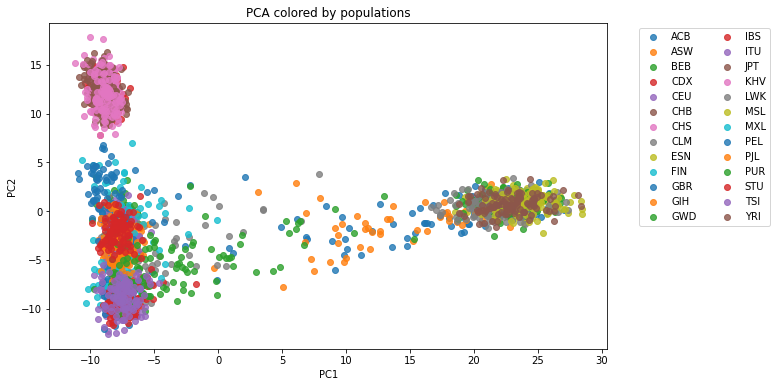

In [154]:
fig, ax = plt.subplots(figsize = (10., 6.))
population = pca_output_df.groupby('pop')

for name, group in population:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, alpha = .8)

plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right', ncol = 2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA colored by populations')

Text(0.5, 1.0, 'PCA colored by super-populations')

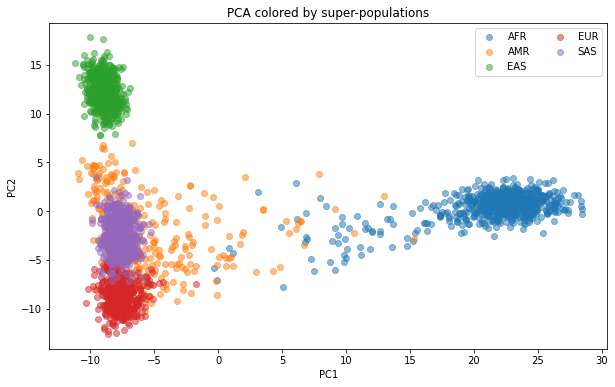

In [151]:
fig, ax = plt.subplots(figsize = (10., 6.))
suppopulation = pca_output_df.groupby('super_pop')

for name, group in suppopulation:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, alpha = 0.5)
plt.legend(loc = 'upper right', ncol = 2)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA colored by super-populations')

Text(0.5, 1.0, 'PCA colored by genders')

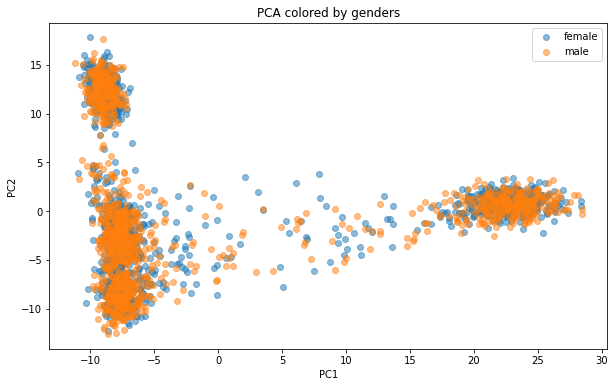

In [152]:
fig, ax = plt.subplots(figsize = (10., 6.))
gender = pca_output_df.groupby('gender')

for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, alpha = .5)
plt.legend(loc = 'upper right')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA colored by genders')

#### Seems that super-population grouping gives satisfying clustering.

## Adv. Q3 Plot the first three PCs

In [104]:
from mpl_toolkits.mplot3d import Axes3D

### Based on the hints

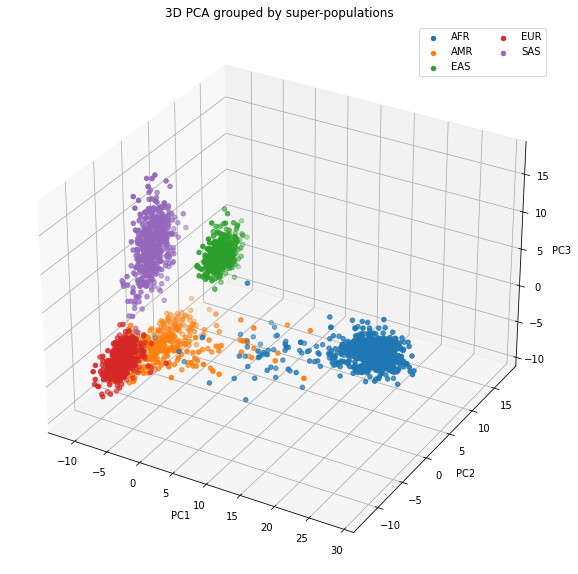

In [136]:
fig = plt.figure(figsize = (10., 10.))
ax = fig.add_subplot(projection='3d')
for name, group in suppopulation:
    ax.scatter(group['PC1'], group['PC2'], group['PC3'], label = name)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA grouped by super-populations')
plt.legend(loc = 'upper right', ncol = 2)

#### The AMR and SAS seem to overlap in 2D PCA but well clustered with addition of PC3.